In [2]:
from plotnine import *
import pandas as pd

In [3]:
df = pd.read_csv("/slurm/home/admin/nlp/DL/97-bioinformatics/R_project/gene_process/去除批次效应/GSE69948.csv", index_col=0)

In [4]:
df.tail()

,NC1,NC2,DC1,DC2,DC3,DC4,NC3,BA1,BA2,BA3,BA4,BA5,BA6
ZXDB,13.790756,14.281568,13.966776,13.910174,13.895197,13.600145,14.383097,14.375718,14.339641,13.972890,14.538250,14.067938,13.092096
ZXDC,12.850578,12.121210,12.350939,12.719175,13.114718,12.877284,12.743783,12.954560,13.133142,13.228368,12.950738,12.625252,13.107871
ZYG11A,11.738092,12.702389,11.959640,12.260626,13.094408,12.881305,12.681678,12.951831,13.013323,13.195218,13.193371,13.152126,12.576484
ZYX,13.237509,13.435800,13.253700,13.292322,13.761863,13.599680,13.819680,13.698488,13.790552,13.869305,13.897845,13.862153,13.578255
ZZEF1,NaN,13.648020,13.784942,13.520373,13.909237,13.739148,13.918817,13.922677,14.071504,14.122383,14.066972,14.164750,13.895670


In [5]:
df_ = pd.melt(df, 
              value_vars=df.columns, 
              var_name="sample", 
              value_name="val")

In [6]:
df_

,sample,val
0,NC1,10.533816
1,NC1,13.084144
2,NC1,12.853894
3,NC1,13.827343
4,NC1,12.924534
...,...,...
189730,BA6,13.092096
189731,BA6,13.107871
189732,BA6,12.576484
189733,BA6,13.578255


/slurm/home/admin/.conda/envs/grns/lib/python3.11/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_boxplot : Removed 1 rows containing non-finite values.


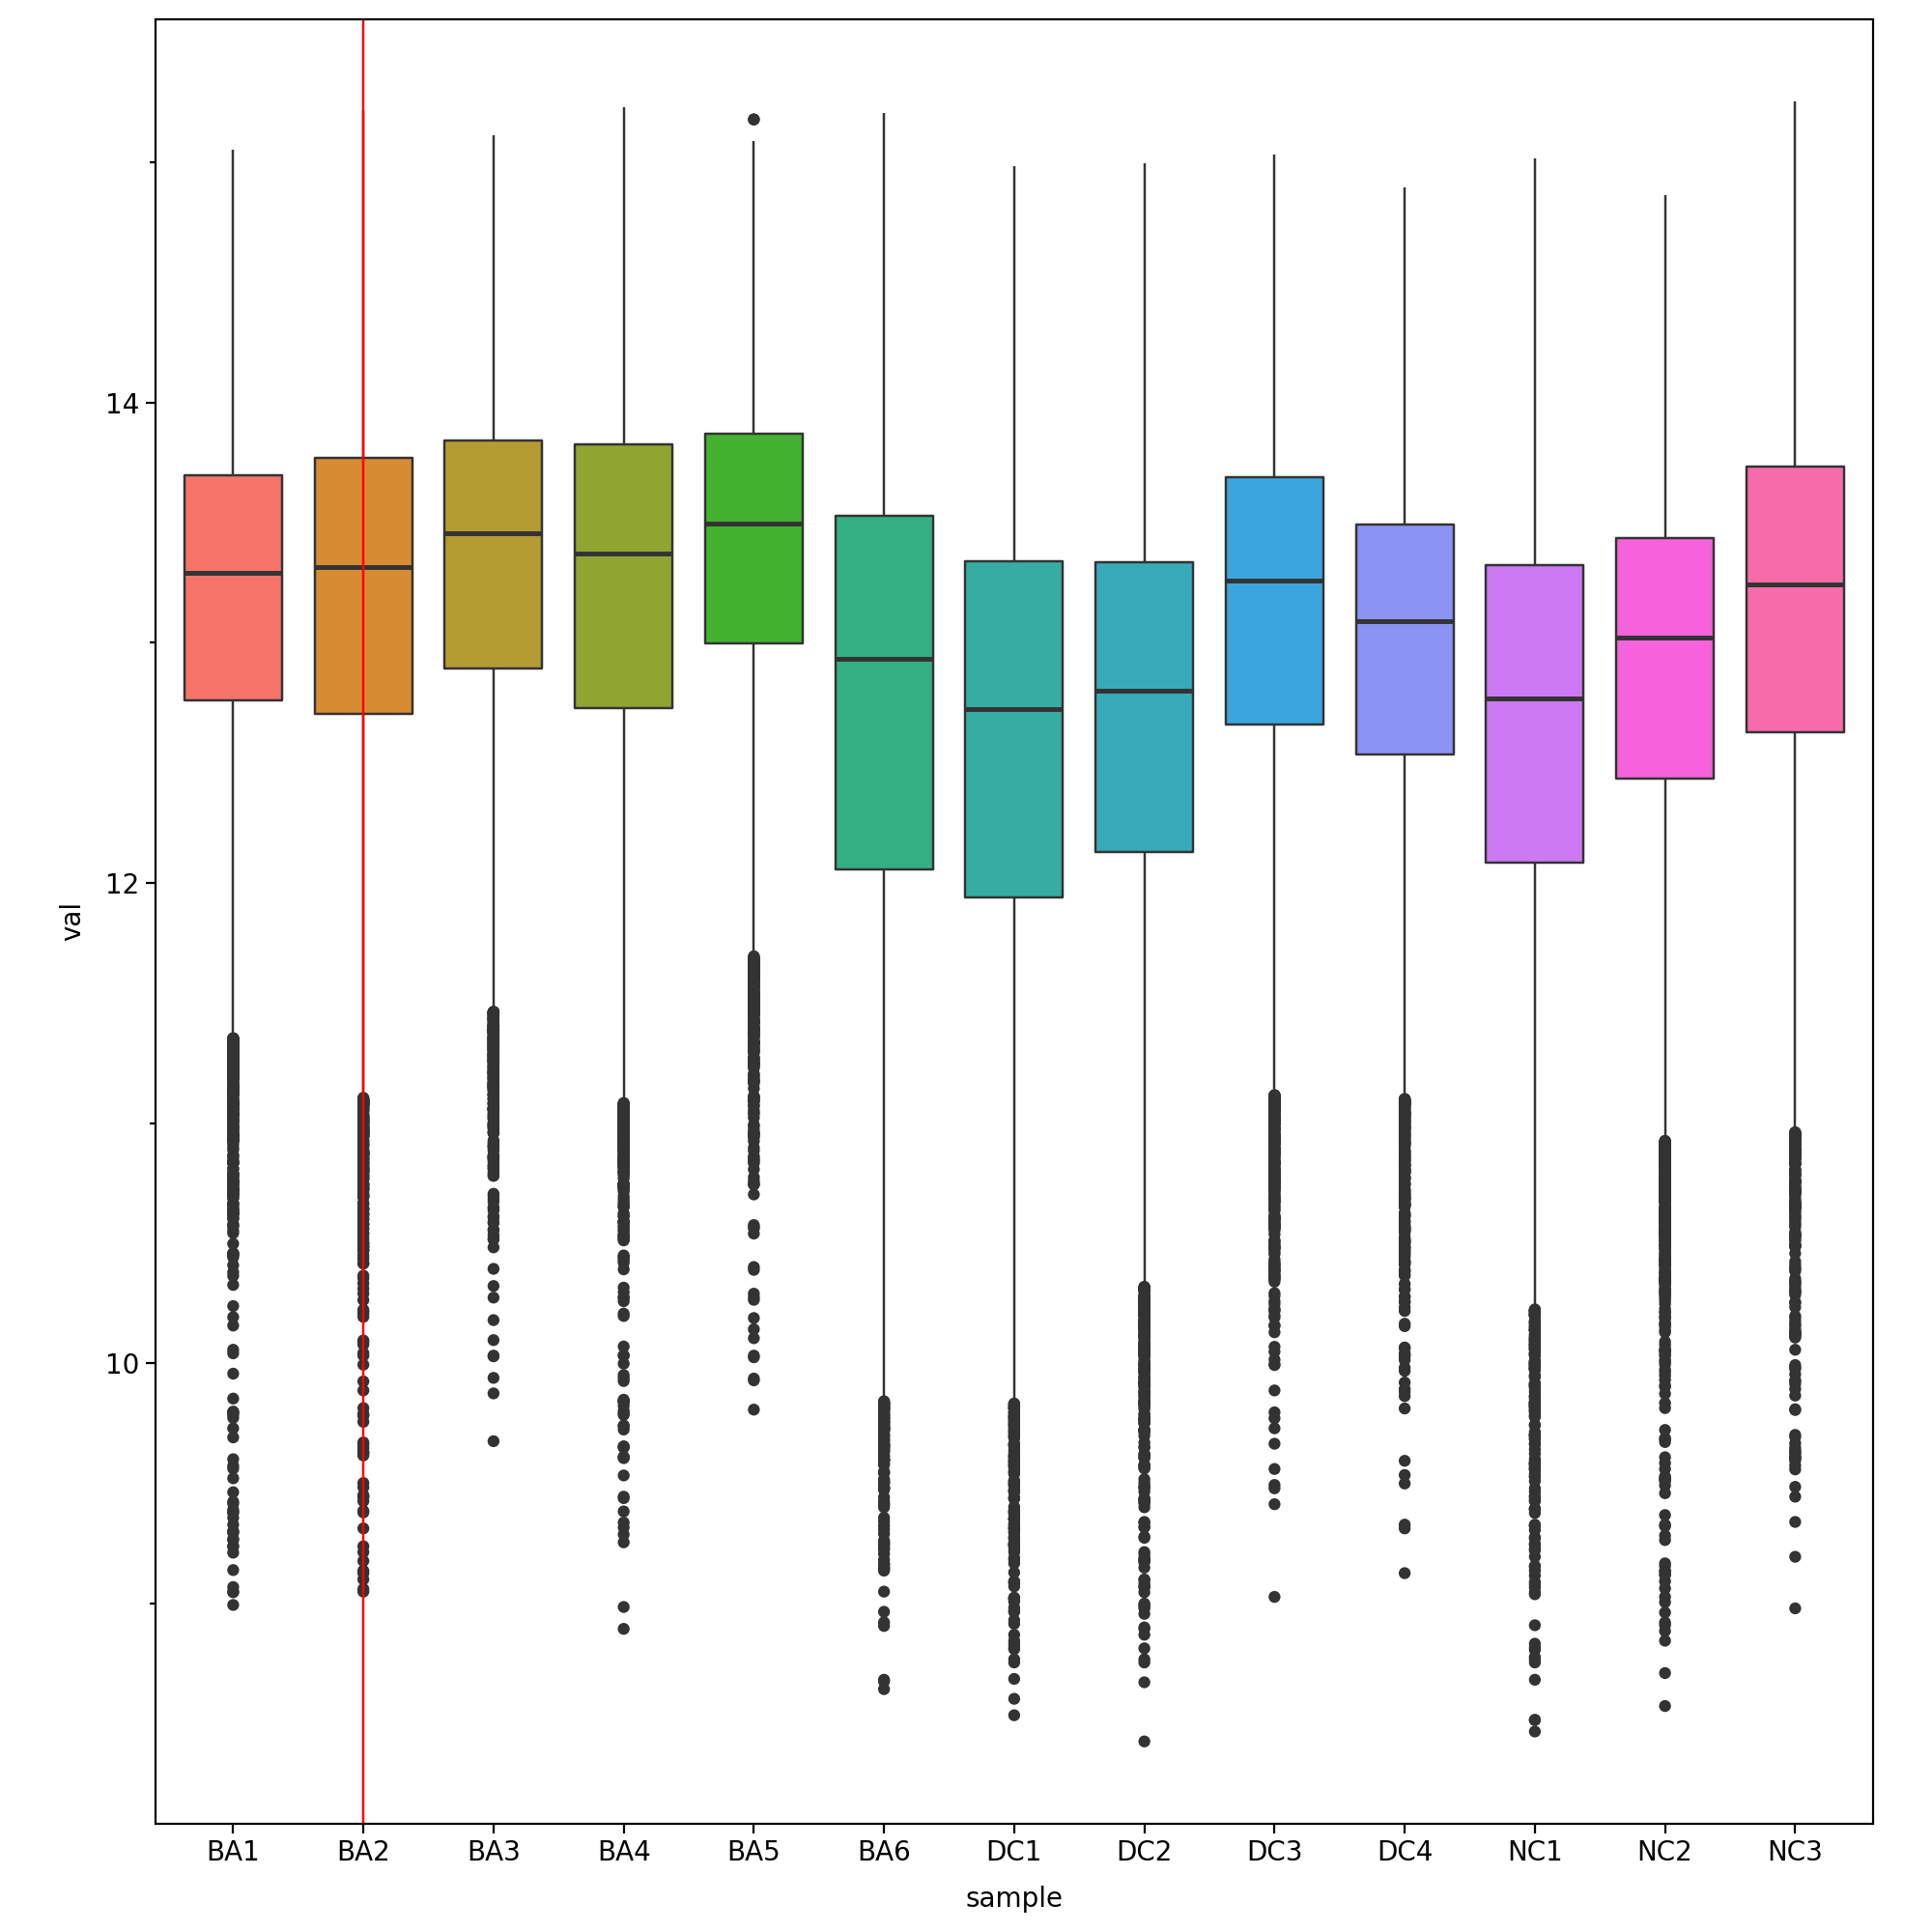

In [7]:
## 画箱图
#ggplot()是底层绘图函数，为必须元素；geom_boxplot()是绘制的几何图形，意思是绘制一个箱型图；
#geom_jitter()是绘制抖动散点图的，代码里已经注释掉了，可以把注释消了试试效果；
#scale_fill_hue(#s:饱和度；l:亮度；h:色调 color_space:hls或husl)是设置色彩变化参数的，可以改一改参数试试效果；
#theme_matplotlib()可以改变背景，把这个注释之后会发现背景改变了，比如网格线或者灰色背景什么的；
#theme()调整主题，这个没有去尝试一些变化
box_plot=(ggplot(df_, aes(x='sample', y="val", fill="sample")) # color="col2" 针对点
+geom_boxplot(show_legend=False)
# +geom_hline(yintercept=10, color='red')
+geom_vline(xintercept=2, color='red') 
# +geom_jitter(fill='black',shape='.',width=0.3,size=3,stroke=0.1,show_legend=False)
+scale_fill_hue(s=0.90, l=0.65, h=0.0417, color_space='husl', na_translate=True, na_value="#1D72FF")
+theme_matplotlib()
+theme(aspect_ratio =1.05,
       dpi=100,
       figure_size=(10,10)))


box_plot

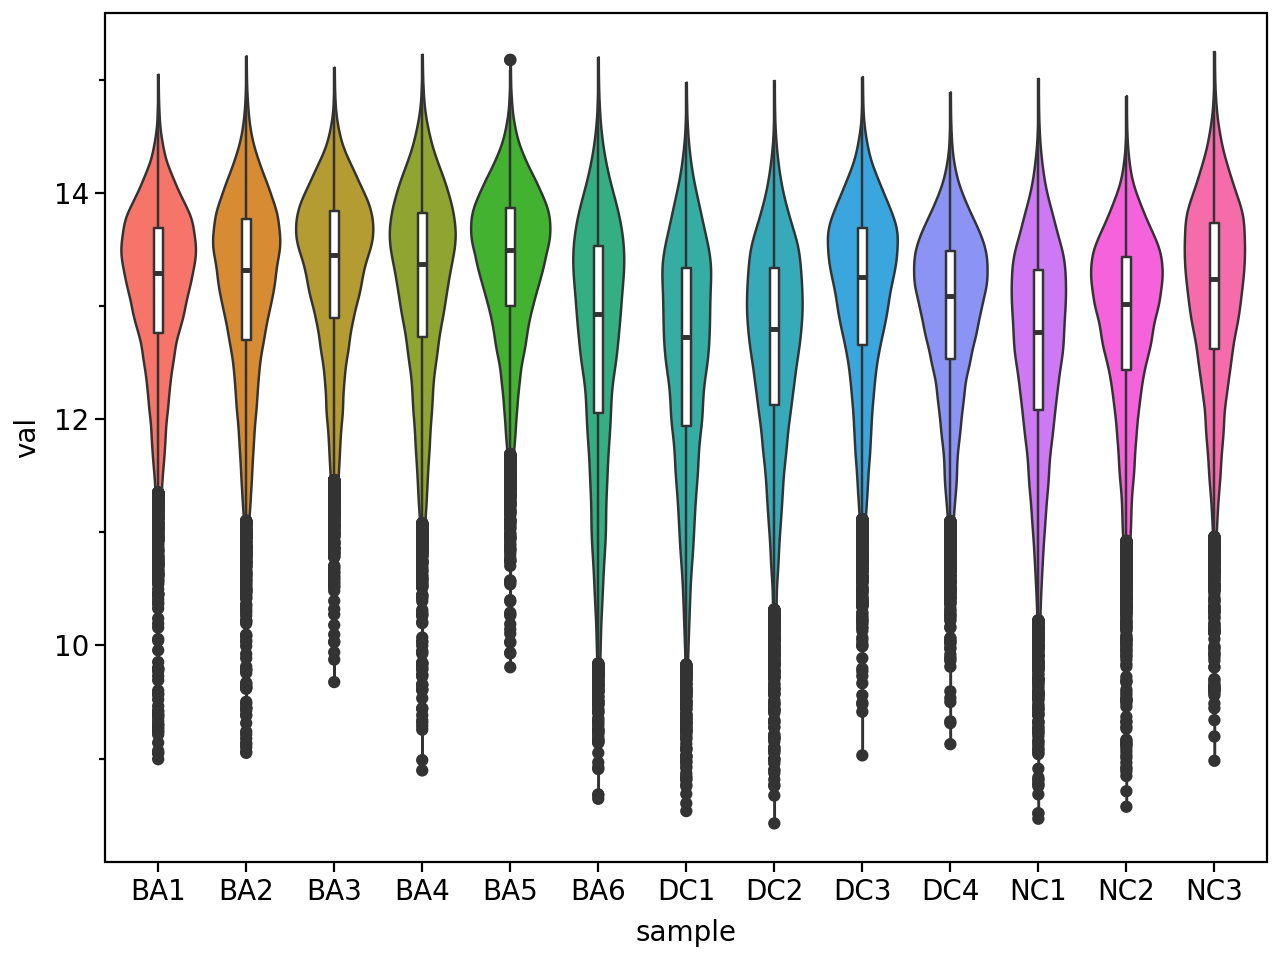

In [40]:
## 
violin_plot = (ggplot(df_,aes(x='sample',y="val",fill="sample"))
                      +geom_violin(show_legend=False)
                      +geom_boxplot(fill='white',width=0.1,show_legend=False)
                      #+geom_jitter(fill='black',shape='.',width=0.3,size=3,stroke=0.1,show_legend=False)
                      +scale_fill_hue(s=0.90,l=0.65,h=0.0417,color_space='husl')
                      +theme_matplotlib())
violin_plot